Computer Vision Object Dectection

Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [1]:
import requests #azure에 있는 패키지를 사용하기 위해 request(통신) 패키지 사용

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO

In [3]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [5]:
subscription_key = '5e44ccaebeff43f889509331fd5aef07'
vision_base_url = 'https://labuser26computervision.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인합니다.

In [12]:
image_url = 'https://img.khan.co.kr/news/2022/01/20/l_2022012001002508600217741.jpg'

In [13]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

# image = Image.open(BytesIO(requests.get(image_url).content))

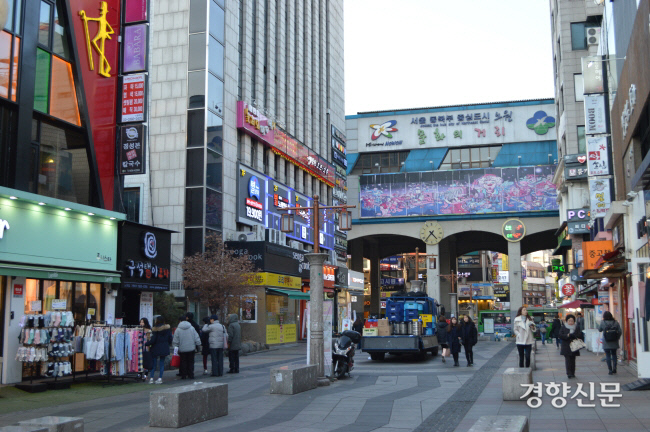

In [14]:
image

In [15]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'VisualFeatures': 'Categories,Description,Color'}
data = {'url':image_url}

#cognitive service ComputerVision visual features 구글링

In [17]:
response = requests.post(analyze_url,headers=headers,params=params,json=data) # 웹 호출은 get 혹은 post 두가지 방법

In [18]:
result = response.json()
result

{'categories': [{'name': 'outdoor_street',
   'score': 0.58203125,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey', 'White'],
  'accentColor': '763734',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['building',
   'road',
   'outdoor',
   'street',
   'city',
   'walking',
   'sidewalk',
   'people',
   'busy',
   'traffic',
   'woman',
   'parked',
   'many',
   'store',
   'bus',
   'man',
   'standing',
   'riding',
   'group',
   'tall',
   'sign',
   'large',
   'driving',
   'hydrant',
   'train',
   'umbrella'],
  'captions': [{'text': 'a group of people walking down a busy city street',
    'confidence': 0.9828142822659374}]},
 'requestId': 'a8b6eacd-89fc-4c30-ba5c-65c9475bd64e',
 'metadata': {'height': 432, 'width': 650, 'format': 'Jpeg'}}

In [23]:
image_captions = result['description']['captions'][0]['text']
image_captions

'a group of people walking down a busy city street'

Object Detection

In [24]:
ObjectDetection_url = vision_base_url + 'detect'
image_url2 = 'https://cdn.huffingtonpost.kr/news/photo/201602/23030_44978.jpeg'

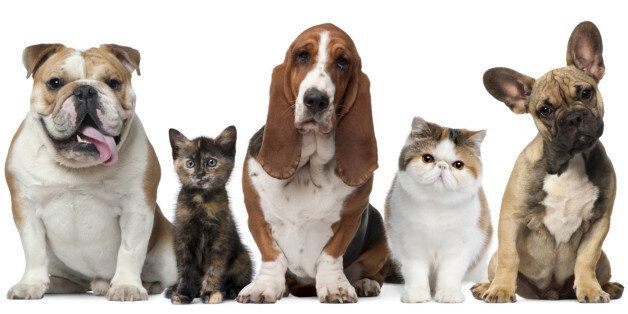

In [26]:
image = Image.open(BytesIO(requests.get(image_url2).content))
image

In [29]:
data2 = {'url':image_url2}

In [37]:
response2 = requests.post(ObjectDetection_url,headers=headers,params=params,json=data2)
result = response2.json()
result

{'objects': [{'rectangle': {'x': 161, 'y': 124, 'w': 90, 'h': 178},
   'object': 'dog',
   'confidence': 0.74,
   'parent': {'object': 'mammal',
    'confidence': 0.838,
    'parent': {'object': 'animal', 'confidence': 0.838}}},
  {'rectangle': {'x': 384, 'y': 111, 'w': 109, 'h': 192},
   'object': 'cat',
   'confidence': 0.696,
   'parent': {'object': 'mammal',
    'confidence': 0.884,
    'parent': {'object': 'animal', 'confidence': 0.884}}},
  {'rectangle': {'x': 3, 'y': 40, 'w': 166, 'h': 264},
   'object': 'dog',
   'confidence': 0.894,
   'parent': {'object': 'mammal',
    'confidence': 0.913,
    'parent': {'object': 'animal', 'confidence': 0.913}}},
  {'rectangle': {'x': 234, 'y': 28, 'w': 154, 'h': 283},
   'object': 'basset hound',
   'confidence': 0.575,
   'parent': {'object': 'hound',
    'confidence': 0.795,
    'parent': {'object': 'dog',
     'confidence': 0.843,
     'parent': {'object': 'mammal',
      'confidence': 0.861,
      'parent': {'object': 'animal', 'confide

In [32]:
from PIL import Image,ImageDraw,ImageFont

In [34]:
draw = ImageDraw.Draw(image)

In [45]:
# BoundingBox를 위한 함수
def DrawBox(detectData):
    objects = detectData['objects']
    for obj in objects:
        rect = obj['rectangle']
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']

        draw.rectangle(((x,y),(x+w,y+h)),outline='red')

        objectName = obj['object']
        draw.text((x,y),objectName,fill='red')
        

In [46]:
DrawBox(result)

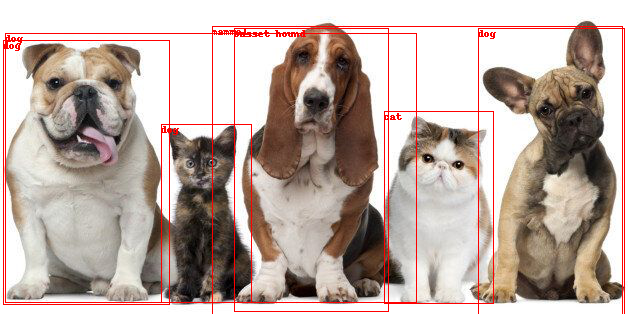

In [47]:
image